# Step 2 : pages cleaning and preparation for extraction 

In [1]:
import pandas as pd 
import numpy as np
import tqdm 
from utils.qwen import infer, getTokenCount
from utils.plots import boxplot_token_counts
tqdm.tqdm.pandas()

In [2]:
df1=pd.read_csv("02-extracted-pages.csv")
df2=pd.read_csv("01-data.csv")


## now every article links to its path for verification later 

In [3]:
df1["path"]=df2["path"]
data=df1.copy()
data.sample(1)

,article_id,title,title_en,abstract_ar,abstract_en,general_field,field,authors,authors_en,publish_date,source,page1,page2,path
1566,1567,NaN,NaN,NaN,NaN,Education,NaN,NaN,NaN,NaN,ARPD,تطويسر أداء مديسري المدارس الثانويسة الصناعيسس...,‎oN go one 1 5‏ 1 محمد عبد الحميد محمد سعدون\n...,finalpdfs/38.pdf


### now getting the token count for each page to see if it needs more cleaning

In [4]:
data["page1_token_count"]=data["page1"].progress_apply(getTokenCount)
data["page2_token_count"]=data["page2"].progress_apply(getTokenCount)

100%|████████████████████████████████████████████| 1635/1635 [00:13<00:00, 125.34it/s]


In [5]:
data['total_tokens']=data["page1_token_count"]+data["page2_token_count"]

In [6]:
data.head(1)

,article_id,title,title_en,abstract_ar,abstract_en,general_field,field,authors,authors_en,publish_date,source,page1,page2,path,page1_token_count,page2_token_count,total_tokens
0,1,درجة اكتساب طلبة كلية التربية بجامعة السلطان ق...,The Level of Acquisition of Action Research Sk...,NaN,NaN,NaN,NaN,"[""نور النجار""]",NaN,NaN,AJP,Association of Arab Universities Journal for E...,مجلة اتحاد الجامعات العربية للتربية وعلم النفس...,finalpdfs/AJP_1337_1.pdf,417,682,1099


### box plot to get token count for each page 

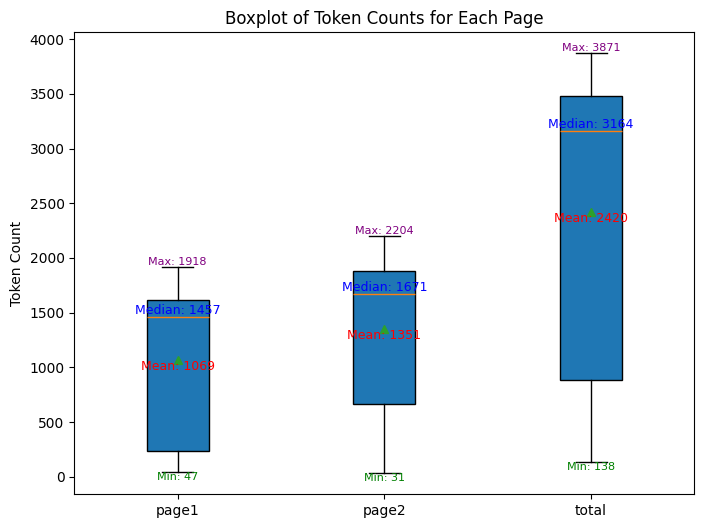

In [7]:
boxplot_token_counts(data)

## Text contain so much ocr noise it needs to be cleaned 

In [8]:
sample = data.sample(1).iloc[0]
print("page1 --------------: \n " + sample["page1"])
print("page2 --------------: \n " + sample["page2"])

page1 --------------: 
 المجلة الأردنية في العلوم التربوية. مجلد 13 ‎sae‏ 3. 2017. 309 - 326

العلوم للجيل القادم ‎NGSS‏

نضال الأحمد” مها البقمي*

تاريخ تسلم البحث 2016/11/15

ملخص: هدفت الدراسة إلى تحليل محتوى كتب الفيزياء في المملكة العربية
السعودية في ضوء ‎jules‏ العلوم للجيل القادم 2719855 حيث ك استخدم المنهج
الوصفي التحليلي» بأداة ة لتحليل كتب الفيزياء في ضوء ‎NGSS‏ في بُعد الطاقة
التابع لمعايير العلوم الفيزيائية. وذلك في مرتكزات: (الأفكار الرئيسة» الممارسات
العلمية والهندسية. المفاهيم الشاملة — المتداخلة). وتوصلت الدراسة إلى: تحقق
المرتكزات الرئيسة في كتب الفيزياء للمرحلة الثانوية» بنسبة تضمين منخفضة يلقت
)33.33 %(« وتركزت في محتوى منهاج الفيزياء للصف الثاني الثانوي في الفصل
الأولء ويمثل مرتكز الأفكار الرئيسة الأكثر ‎Last‏ في المحتوى. بنسبة تضمين
متوسطة بلغت (76651.9), وجاء ‎LE‏ مرتكز المفاهيم الشاملة بنسبة تضمين
منخفضة بلغت )%31.1( وجاء مرتكز الممارسات العلمية والهندسية ثالثا بنسبة
تضمين منخفضة جداً بلغت )%16.35( وظهر تباين في مستوى تضمين
المعايير الرئيسة لكل مرتكزء حيث إن معيا

In [9]:
#This function normalises text , removes ocr noise and removes non arabic text blocs
from utils.preprocessing import clean_page


In [10]:
print("page1 --------------: \n " + clean_page(sample["page1"]))
print("page2 --------------: \n " + clean_page(sample["page2"]))

page1 --------------: 
 المجله الاردنيه في العلوم التربويه. مجلد 13 sae 3. 2017. 309 - 326
العلوم للجيل القادم NGSS 
نضال الاحمد مها البقمي*
تاريخ تسلم البحث 2016/11/15
ملخص: هدفت الدراسه الا تحليل محتوا كتب الفيزياء في المملكه العربيه
السعوديه في ضوء jules العلوم للجيل القادم 2719855 حيث ك استخدم المنهج
الوصفي التحليلي باداه ه لتحليل كتب الفيزياء في ضوء NGSS في بعد الطاقه
التابع لمعايير العلوم الفيزيائيه. وذلك في مرتكزات: (الافكار الرئيسه الممارسات
العلميه والهندسيه. المفاهيم الشامله المتداخله). وتوصلت الدراسه الا: تحقق
المرتكزات الرئيسه في كتب الفيزياء للمرحله الثانويه بنسبه تضمين منخفضه يلقت
)33.33 ( وتركزت في محتوا منهاج الفيزياء للصف الثاني الثانوي في الفصل
الاولء ويمثل مرتكز الافكار الرئيسه الاكثر Last في المحتوا. بنسبه تضمين
متوسطه بلغت (76651.9), وجاء LE مرتكز المفاهيم الشامله بنسبه تضمين
منخفضه بلغت ) 31.1( وجاء مرتكز الممارسات العلميه والهندسيه ثالثا بنسبه
تضمين منخفضه جدا بلغت ) 16.35( وظهر تباين في مستوا تضمين
المعايير الرئيسه لكل مرتكزء حيث ان معيار حفظ وانتقال الطاقه كان 

In [11]:
data["page1"] = data["page1"].progress_apply(clean_page)
data["page2"] = data["page2"].progress_apply(clean_page)

100%|███████████████████████████████████████████| 1635/1635 [00:00<00:00, 1656.40it/s]


### Recalculate and replot

In [12]:
data["page1_token_count"]=data["page1"].progress_apply(getTokenCount)
data["page2_token_count"]=data["page2"].progress_apply(getTokenCount)

100%|████████████████████████████████████████████| 1635/1635 [00:12<00:00, 129.08it/s]


In [13]:
data['total_tokens']=data["page1_token_count"]+data["page2_token_count"]

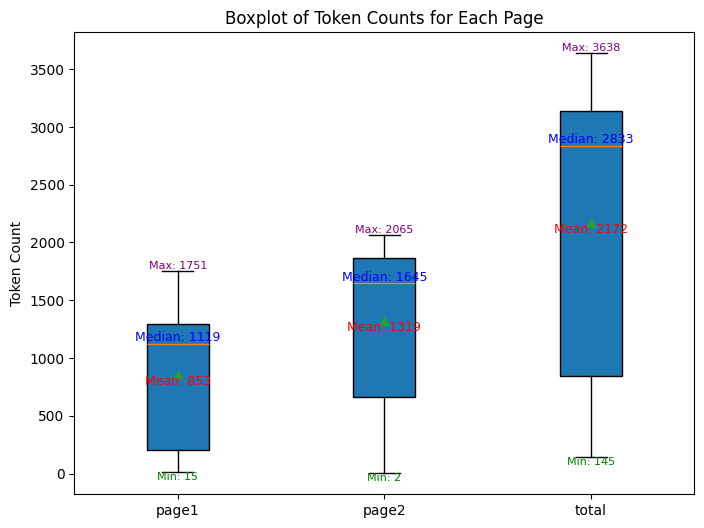

In [14]:
boxplot_token_counts(data)

### Conclusion : reduction in tokens further cleaning needed  

#### let's remove rows whose totaltokens is less than (400 token ~ 200 words) 

In [15]:
removed = (data["total_tokens"] < 400).sum()
data = data[data["total_tokens"] >= 400].reset_index(drop=True)

print("Rows removed:", removed)

Rows removed: 11


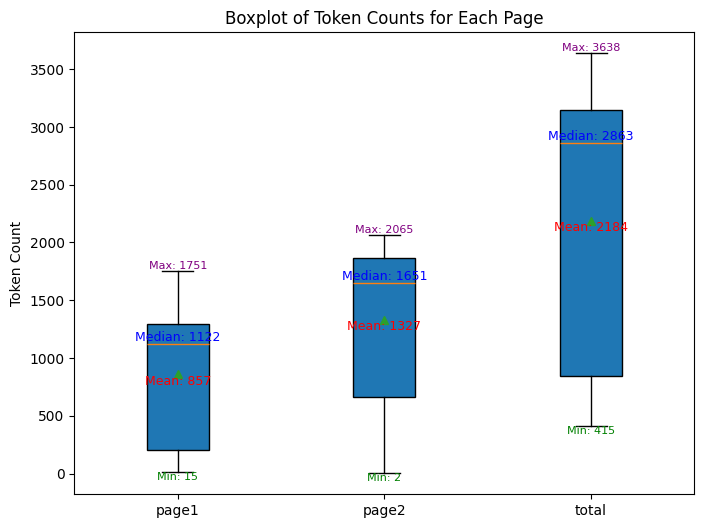

In [16]:
boxplot_token_counts(data)

### move non arabic names to authors_en


In [17]:
sample = data.iloc[40]
sample["authors"]

'["Reda El-Yazidi"]'

In [18]:
from utils.preprocessing import move_non_arabic 
move_non_arabic(sample)

authors                     None
authors_en    ["Reda El-Yazidi"]
dtype: object

In [19]:
data[["authors", "authors_en"]] = data.progress_apply(move_non_arabic, axis=1)

100%|███████████████████████████████████████████| 1624/1624 [00:00<00:00, 6532.36it/s]


In [20]:
columns_to_keep = [
    "article_id",
    "title",
    "abstract_ar",
    "authors",
    "authors_en",
    "general_field",
    "publish_date",
    "page1",
    "page2",
    "source",
    "path"
]

data = data[columns_to_keep].copy()
## add keywords for later
data["keywords"] = None

In [21]:
data.to_csv("03-pages_cleaned.csv",index=False)